## Preparación inicial

In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import io
from PIL import Image
import selenium
import polyline
import numpy as np

In [2]:
xls = pd.ExcelFile('Prueba.xlsx')

In [3]:
sheet_names = xls.sheet_names
sheet_names

['Instrucciones', 'Glosario', 'PuntoPartida', 'PuntoLlegada', 'Siniestros']

In [4]:
punto_partida_df = pd.read_excel(xls, 'PuntoPartida')
punto_llegada_df = pd.read_excel(xls, 'PuntoLlegada')
siniestros_df = pd.read_excel(xls, 'Siniestros')

### Análisis Exploratorio
* Las coordenadas en ```punto_partida_df``` y ```punto_llegada_df``` están escritas en la notación *decimal degrees*.
* Las latitudes deben de ser números entre -90 y 90 grados.
* Las longitudes deben de ser números entre -180 y 180 grados.

#### punto_partida_df

In [5]:
punto_partida_df.dtypes

IDRuta                   object
NombreRuta               object
TipoUbicacion            object
Empresa                  object
HoraProgramadaSalida     object
Longitud                float64
Latitud                 float64
ValorMercancia            int64
IDConductor               int64
dtype: object

In [6]:
punto_partida_df.head()

,IDRuta,NombreRuta,TipoUbicacion,Empresa,HoraProgramadaSalida,Longitud,Latitud,ValorMercancia,IDConductor
0,a1,Relleno de Inventario,Bodega,Empresa 1,10:00:00,-100.316540,25.696300,150000,1
1,b2,Traslado de efectivo,Tienda,Empresa 1,09:00:00,-100.203823,25.663144,300000,1
2,c3,Relleno de Inventario,Bodega,Empresa 3,14:00:00,-100.145293,25.788839,1500000,1
3,d4,Relleno de Inventario,Bodega,Empresa 2,11:00:00,-100.367606,25.814914,200000,1
4,e5,Traslado de efectivo,Tienda,Empresa 3,15:00:00,-100.421277,25.744508,123000,1


#### punto_llegada_df

In [7]:
punto_llegada_df.dtypes

IDRuta             object
NombreRuta         object
TipoUbicacion      object
Empresa            object
HoraSalida         object
Longitud           object
Latitud           float64
ValorMercancia      int64
IDConductor         int64
dtype: object

* La columna ```longitud``` debería ser de tipo ```float64```.

In [8]:
punto_llegada_df.head()

,IDRuta,NombreRuta,TipoUbicacion,Empresa,HoraSalida,Longitud,Latitud,ValorMercancia,IDConductor
0,a1,Relleno de Inventario,Tienda,Empresa 1,10:03:00,-100.228542,25.550476,150000,1
1,b2,Traslado de efectivo,Banco,Banco 1,08:58:00,"-100.318156048963,",25.685163,300000,1
2,c3,Relleno de Inventario,Tienda,Empresa 3,14:10:00,-100.242414,25.664271,1500000,1
3,d4,Relleno de Inventario,Tienda,Empresa 2,11:00:19,-100.381548,25.664200,200000,1
4,e5,Traslado de efectivo,Banco,Banco 1,16:00:00,-100.318156,25.685163,123000,1


* Un valor en la columna *Longitud* no es un float valido pues termina con una coma.

In [9]:
# Remove any commas from the 'Longitud' column
punto_llegada_df['Longitud'] = punto_llegada_df['Longitud'].astype(str).str.replace(',', '', regex=False)

# Optionally, convert the cleaned column back to numeric if it's supposed to be numbers
punto_llegada_df['Longitud'] = pd.to_numeric(punto_llegada_df['Longitud'], errors='coerce')

In [10]:
punto_llegada_df.head()

,IDRuta,NombreRuta,TipoUbicacion,Empresa,HoraSalida,Longitud,Latitud,ValorMercancia,IDConductor
0,a1,Relleno de Inventario,Tienda,Empresa 1,10:03:00,-100.228542,25.550476,150000,1
1,b2,Traslado de efectivo,Banco,Banco 1,08:58:00,-100.318156,25.685163,300000,1
2,c3,Relleno de Inventario,Tienda,Empresa 3,14:10:00,-100.242414,25.664271,1500000,1
3,d4,Relleno de Inventario,Tienda,Empresa 2,11:00:19,-100.381548,25.664200,200000,1
4,e5,Traslado de efectivo,Banco,Banco 1,16:00:00,-100.318156,25.685163,123000,1


In [11]:
punto_llegada_df.dtypes

IDRuta             object
NombreRuta         object
TipoUbicacion      object
Empresa            object
HoraSalida         object
Longitud          float64
Latitud           float64
ValorMercancia      int64
IDConductor         int64
dtype: object

#### siniestros_df

In [12]:
siniestros_df.dtypes

FolioSiniestro       int64
Evento              object
Subtipo             object
UnidadOperativa     object
IDTienda           float64
IDVehiculo         float64
ValorPerdido         int64
Latitud            float64
Longitud           float64
dtype: object

In [13]:
siniestros_df.head()

,FolioSiniestro,Evento,Subtipo,UnidadOperativa,IDTienda,IDVehiculo,ValorPerdido,Latitud,Longitud
0,10001415,Robo,Con violencia,Tienda,4.0,NaN,84723,25.808908,-100.379278
1,10001213,Robo,Con violencia,Vehiculo,NaN,2.0,117041,25.799021,-100.386182
2,10001224,Robo,Sin violencia,Vehiculo,NaN,2.0,116400,25.797738,-100.381691
3,10001327,Robo,Sin violencia,Vehiculo,NaN,3.0,117888,25.786821,-100.379681
4,10001316,Robo,Con violencia,Tienda,3.0,NaN,73533,25.777179,-100.180762


In [ ]:
siniestros_df.sum().groupby('Evento')[['Evento', 'ValorPerdido']]

## Calcular driving distance

In [14]:
rutas_df = pd.merge(
    punto_partida_df,
    punto_llegada_df,
    on=['IDRuta', 'NombreRuta', 'ValorMercancia', 'IDConductor'],
    suffixes=('Partida', 'Llegada')  # To differentiate columns if any aren't shared
)

# Show the merged DataFrame
rutas_df

,IDRuta,NombreRuta,TipoUbicacionPartida,EmpresaPartida,HoraProgramadaSalida,LongitudPartida,LatitudPartida,ValorMercancia,IDConductor,TipoUbicacionLlegada,EmpresaLlegada,HoraSalida,LongitudLlegada,LatitudLlegada
0,a1,Relleno de Inventario,Bodega,Empresa 1,10:00:00,-100.316540,25.696300,150000,1,Tienda,Empresa 1,10:03:00,-100.228542,25.550476
1,b2,Traslado de efectivo,Tienda,Empresa 1,09:00:00,-100.203823,25.663144,300000,1,Banco,Banco 1,08:58:00,-100.318156,25.685163
2,c3,Relleno de Inventario,Bodega,Empresa 3,14:00:00,-100.145293,25.788839,1500000,1,Tienda,Empresa 3,14:10:00,-100.242414,25.664271
3,d4,Relleno de Inventario,Bodega,Empresa 2,11:00:00,-100.367606,25.814914,200000,1,Tienda,Empresa 2,11:00:19,-100.381548,25.664200
4,e5,Traslado de efectivo,Tienda,Empresa 3,15:00:00,-100.421277,25.744508,123000,1,Banco,Banco 1,16:00:00,-100.318156,25.685163


In [15]:
def get_driving_distance(start_coords, end_coords):
    # Unpack the coordinates
    start_lon, start_lat = start_coords
    end_lon, end_lat = end_coords

    # OSRM API endpoint
    url = f"http://router.project-osrm.org/route/v1/driving/{start_lon},{start_lat};{end_lon},{end_lat}?overview=false"

    # Send the request to OSRM API
    response = requests.get(url)
    
    # Parse the JSON response
    data = response.json()

    if data and 'routes' in data:
        # Extract the distance in meters
        distance = data['routes'][0]['distance']
        # Extract the duration in seconds
        duration = data['routes'][0]['duration']
        return distance, duration
    else:
        return None, None

# Example usage with coordinates from your spreadsheet
start_coords = (-100.31654, 25.6963)  # Starting point coordinates
end_coords = (-100.228542, 25.550476)  # Destination point coordinates

distance, duration = get_driving_distance(start_coords, end_coords)
print(f"Driving Distance: {distance} meters, Duration: {duration} seconds")

Driving Distance: 20482.1 meters, Duration: 1054.3 seconds


In [16]:
# Apply function to each row in rutas_df
def apply_driving_distance(row):
    # Extract the starting and ending coordinates
    start_coords = (row['LongitudPartida'], row['LatitudPartida'])
    end_coords = (row['LongitudLlegada'], row['LatitudLlegada'])
    
    # Get the driving distance and duration
    distance, duration = get_driving_distance(start_coords, end_coords)
    
    return pd.Series([distance, duration], index=['DistanceMeters', 'DurationSeconds'])

# Apply the function to every row and store results in new columns
rutas_df[['DistanceMeters', 'DurationSeconds']] = rutas_df.apply(apply_driving_distance, axis=1)

In [17]:
rutas_df

,IDRuta,NombreRuta,TipoUbicacionPartida,EmpresaPartida,HoraProgramadaSalida,LongitudPartida,LatitudPartida,ValorMercancia,IDConductor,TipoUbicacionLlegada,EmpresaLlegada,HoraSalida,LongitudLlegada,LatitudLlegada,DistanceMeters,DurationSeconds
0,a1,Relleno de Inventario,Bodega,Empresa 1,10:00:00,-100.316540,25.696300,150000,1,Tienda,Empresa 1,10:03:00,-100.228542,25.550476,20482.1,1054.3
1,b2,Traslado de efectivo,Tienda,Empresa 1,09:00:00,-100.203823,25.663144,300000,1,Banco,Banco 1,08:58:00,-100.318156,25.685163,13728.1,1052.4
2,c3,Relleno de Inventario,Bodega,Empresa 3,14:00:00,-100.145293,25.788839,1500000,1,Tienda,Empresa 3,14:10:00,-100.242414,25.664271,23049.7,1570.3
3,d4,Relleno de Inventario,Bodega,Empresa 2,11:00:00,-100.367606,25.814914,200000,1,Tienda,Empresa 2,11:00:19,-100.381548,25.664200,25139.5,1597.2
4,e5,Traslado de efectivo,Tienda,Empresa 3,15:00:00,-100.421277,25.744508,123000,1,Banco,Banco 1,16:00:00,-100.318156,25.685163,14105.0,928.2


In [40]:
rutas_df['DistanceKm'] = rutas_df['DistanceMeters']/1000
rutas_df['DurationMinutes'] = rutas_df['DurationSeconds']/60

In [41]:
rutas_df[['IDRuta', 'NombreRuta', 'DistanceKm', 'DurationMinutes']]

,IDRuta,NombreRuta,DistanceKm,DurationMinutes
0,a1,Relleno de Inventario,20.4821,17.571667
1,b2,Traslado de efectivo,13.7281,17.540000
2,c3,Relleno de Inventario,23.0497,26.171667
3,d4,Relleno de Inventario,25.1395,26.620000
4,e5,Traslado de efectivo,14.1050,15.470000


## Visualizar ```siniestros_df```

### Distribución de tipos de evento

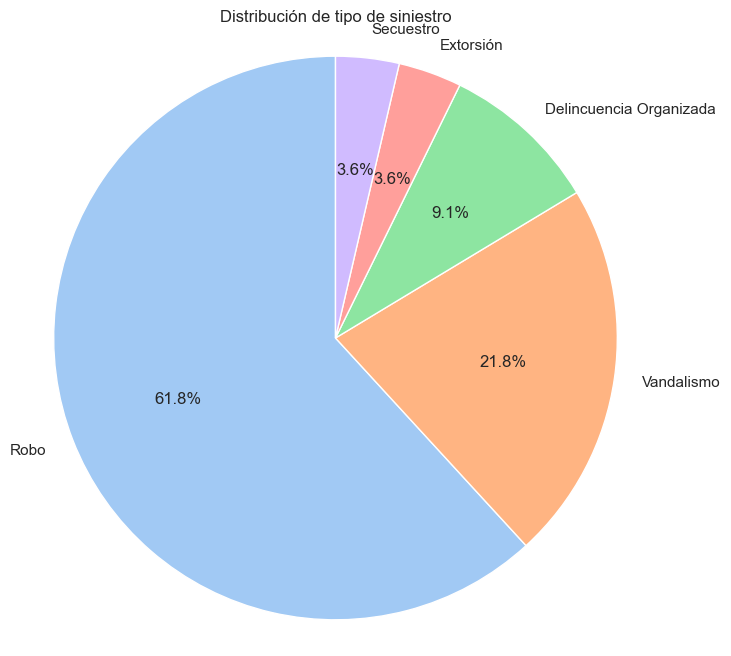

In [18]:
# Apply Seaborn theme to Matplotlib plots
sns.set_theme()

# Assuming 'TipoSiniestro' is the column that contains the siniestro types
# Count the occurrences of each type
siniestro_counts = siniestros_df['Evento'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(siniestro_counts, labels=siniestro_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribución de tipo de siniestro')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()


### Distribución de valor perdido

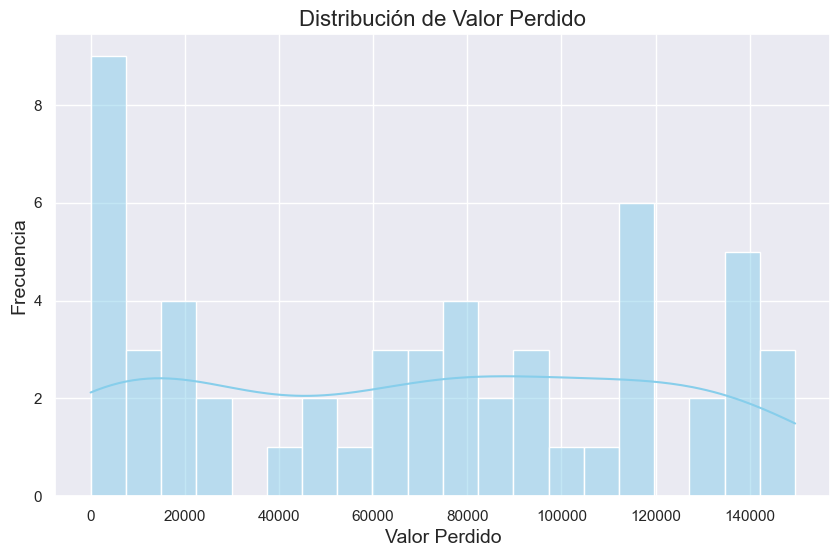

In [19]:
# Set Seaborn theme for better aesthetics
sns.set_theme()

# Plot the histogram of "Valor Perdido"
plt.figure(figsize=(10, 6))  # Optional: Set figure size
sns.histplot(siniestros_df['ValorPerdido'], bins=20, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribución de Valor Perdido', fontsize=16)
plt.xlabel('Valor Perdido', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Show the plot
plt.show()

### Distribución de valor perdido por tipo de incidente

/var/folders/gf/8nm7hnt56930dgzv4ygl2z8w0000gn/T/ipykernel_23716/684216408.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evento', y='ValorPerdido', data=incidentes_df, palette='Set2')


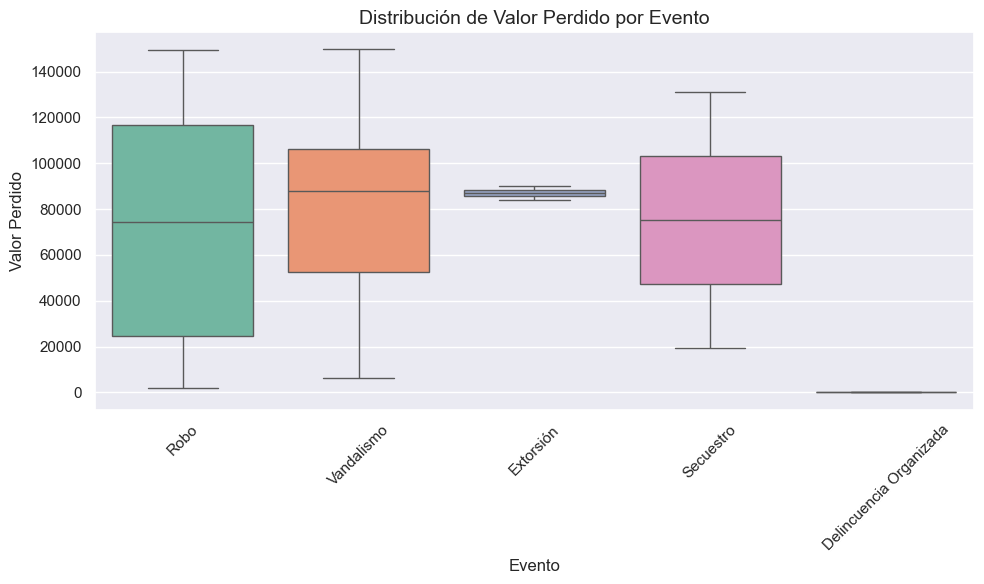

In [20]:
# Group the data by 'Evento' and 'Subtipo'
incidentes_df = siniestros_df[['Evento', 'ValorPerdido']]

# Create a boxplot to visualize the distribution of 'ValorPerdido' for each 'Subtipo'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Evento', y='ValorPerdido', data=incidentes_df, palette='Set2')

# Add labels and title
plt.title('Distribución de Valor Perdido por Evento', fontsize=14)
plt.xlabel('Evento', fontsize=12)
plt.ylabel('Valor Perdido', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Visualización geográfica de siniestros

* Crear un diccionario de tipos de eventos con color correspondiente.

In [21]:
eventos = siniestros_df.Evento.unique()
eventos

array(['Robo', 'Vandalismo', 'Extorsión', 'Secuestro',
       'Delincuencia Organizada'], dtype=object)

In [22]:
colors = ['blue', 'green', 'red', 'yellow', 'purple']

In [23]:
event_colors = dict(zip(eventos, colors))
event_colors

{'Robo': 'blue',
 'Vandalismo': 'green',
 'Extorsión': 'red',
 'Secuestro': 'yellow',
 'Delincuencia Organizada': 'purple'}

* Crear mapa usando ```folium```. Creamos un mapa base que tenga como su centro el promedio de las coordenadas de los siniestros.

In [24]:
# Create a base map centered around the average coordinates
m = folium.Map(location=[siniestros_df['Latitud'].mean(), siniestros_df['Longitud'].mean()], zoom_start=11, zoom_control=False)

# Loop through the DataFrame to add markers for each event
for index, row in siniestros_df.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=row['Evento'],  # This shows the event type on marker click
        icon=folium.Icon(color=event_colors.get(row['Evento'], 'gray'), icon='glyphicon glyphicon-warning-sign')  # Default to gray if type not found
    ).add_to(m)
    
m

/var/folders/gf/8nm7hnt56930dgzv4ygl2z8w0000gn/T/ipykernel_23716/2798578688.py:9: UserWarning: color argument of Icon should be one of: {'green', 'white', 'lightred', 'darkred', 'black', 'lightblue', 'beige', 'lightgreen', 'pink', 'red', 'purple', 'blue', 'orange', 'darkpurple', 'lightgray', 'darkblue', 'gray', 'cadetblue', 'darkgreen'}.
  icon=folium.Icon(color=event_colors.get(row['Evento'], 'gray'), icon='glyphicon glyphicon-warning-sign')  # Default to gray if type not found


* Crear una leyenda para poder distinguir los tipos de eventos en el mapa.

In [25]:
legend_items = ''.join(
    f'<li><span style="background-color: {color}; width: 20px; height: 20px; display: inline-block;"></span> {event_type}</li>'
    for event_type, color in event_colors.items()
)

legend_html = f'''
    <div style="position: fixed; 
                top: 10px; left: 10px; 
                width: 150px; height: auto; 
                z-index: 1000; 
                background-color: white; 
                border:2px solid grey; 
                border-radius:5px; 
                padding: 10px;">
        <h4 style="margin: 0;">Tipo de Evento</h4>
        <ul style="list-style-type:none; padding: 0;">
            {legend_items}
        </ul>
    </div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))


# Save the map to an HTML file
m.save('siniestros_mapa.html')

m

* Guardar imagen usando ```selenium```.

In [26]:
img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('siniestros_mapa.png')

## Visualizacón de rutas
* Para visualizar las rutas, continuar usando ```folium``` y obtener coordenadas de rutas utilizando *OSM*.

In [27]:
# Function to get route coordinates from OSRM
def get_route(start_coords, end_coords):
    url = f"http://router.project-osrm.org/route/v1/driving/{start_coords[1]},{start_coords[0]};{end_coords[1]},{end_coords[0]}?overview=full"
    response = requests.get(url)
    
    if response.status_code == 200:
        route = response.json()
        if route.get('routes'):  # Check if 'routes' exists
            # Decode the polyline to get a list of (lat, lon) tuples
            polyline_points = route['routes'][0]['geometry']
            return polyline.decode(polyline_points)  # Decode the polyline
        else:
            print("No routes found in the response:", route)  # Debugging output
    else:
        print(f"Error {response.status_code}: {response.text}")  # Print error message for debugging
    
    return None

In [28]:
# Create a base map centered around the average coordinates of the routes
average_lat = (rutas_df['LatitudPartida'].mean() + rutas_df['LatitudLlegada'].mean()) / 2
average_lon = (rutas_df['LongitudPartida'].mean() + rutas_df['LongitudLlegada'].mean()) / 2
m = folium.Map(location=[average_lat, average_lon], zoom_start=11)

m

In [29]:
# Redefinir colors para re-ejecutar celda sin necesidad de ejecutar celdas anteriores
colors = ['blue', 'green', 'red', 'black', 'purple']

# Loop through the rutas_df to add markers and draw routes
for index, row in rutas_df.iterrows():
    color = colors.pop()
    
    start_coords = (row['LatitudPartida'], row['LongitudPartida'])
    end_coords = (row['LatitudLlegada'], row['LongitudLlegada'])
    
    # Get the route coordinates from OSRM
    route_coords = get_route(start_coords, end_coords)

    if route_coords:
        # Add a marker for the starting point
        folium.Marker(
            location=start_coords,
            popup=f"Ruta: {row['IDRuta']} - Salida",
            icon=folium.Icon(color=color, icon='glyphicon glyphicon-map-marker')
        ).add_to(m)
        
        # Add a marker for the ending point
        folium.Marker(
            location=end_coords,
            popup=f"Ruta: {row['IDRuta']} - Llegada",
            icon=folium.Icon(color=color, icon='glyphicon glyphicon-map-marker')
        ).add_to(m)
        # Draw a line using the route coordinates
        folium.PolyLine(locations=route_coords, color=color).add_to(m)

# Save the map to an HTML file
m.save('rutas_mapa.html')

# Display the map
m

In [30]:
img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('rutas_mapa.png')

## Visualizar rutas y siniestros en conjunto

In [31]:
for index, row in siniestros_df.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=row['Evento'],  # This shows the event type on marker click
        icon=folium.Icon(color=event_colors.get(row['Evento'], 'gray'), icon='glyphicon glyphicon-warning-sign')  # Default to gray if type not found
    ).add_to(m)
    
m

/var/folders/gf/8nm7hnt56930dgzv4ygl2z8w0000gn/T/ipykernel_23716/293521869.py:5: UserWarning: color argument of Icon should be one of: {'green', 'white', 'lightred', 'darkred', 'black', 'lightblue', 'beige', 'lightgreen', 'pink', 'red', 'purple', 'blue', 'orange', 'darkpurple', 'lightgray', 'darkblue', 'gray', 'cadetblue', 'darkgreen'}.
  icon=folium.Icon(color=event_colors.get(row['Evento'], 'gray'), icon='glyphicon glyphicon-warning-sign')  # Default to gray if type not found


In [32]:
legend_items = ''.join(
    f'<li><span style="background-color: {color}; width: 20px; height: 20px; display: inline-block;"></span> {event_type}</li>'
    for event_type, color in event_colors.items()
)

legend_html = f'''
    <div style="position: fixed; 
                top: 10px; left: 10px; 
                width: 150px; height: auto; 
                z-index: 1000; 
                background-color: white; 
                border:2px solid grey; 
                border-radius:5px; 
                padding: 10px;">
        <h4 style="margin: 0;">Tipo de Evento</h4>
        <ul style="list-style-type:none; padding: 0;">
            {legend_items}
        </ul>
    </div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))


# Save the map to an HTML file
m.save('mapa.html')

m

In [33]:
img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('mapa.png')

## Evaluar riesgo de rutas

Para evaluar el riesgo de las rutas, existen diferentes variables para tomar en cuenta:
* Frecuencia de los tipos de siniestros
* Severidad de los tipos de siniestros
* Cercanía de las rutas a los siniestros
* Uso de violencia
* Valor perdido

In [34]:
incidentes_df.groupby('Evento').describe()

ValorPerdido                                       \
                               count          mean           std      min   
Evento                                                                      
Delincuencia Organizada          5.0      0.000000      0.000000      0.0   
Extorsión                        2.0  87004.000000   4164.858941  84059.0   
Robo                            34.0  74755.029412  48635.479671   2022.0   
Secuestro                        2.0  75237.000000  78986.655886  19385.0   
Vandalismo                      12.0  80936.250000  46306.640313   6217.0   

                                                                 
                              25%      50%        75%       max  
Evento                                                           
Delincuencia Organizada      0.00      0.0       0.00       0.0  
Extorsión                85531.50  87004.0   88476.50   89949.0  
Robo                     24829.50  74411.0  116880.75  149521.0  
Secuestro                47311.00  75237.0  103163.00  131089.0  
Vandalismo               52438.25  87805.0  106047.00  149627.0

In [35]:
# Function to calculate Euclidean distance between two points (in lat/lon)
def euclidean_distance(coord1, coord2):
    # Approximate conversion factor: 1 degree of latitude ~ 111 km, longitude varies by latitude
    lat1, lon1 = np.radians(coord1)
    lat2, lon2 = np.radians(coord2)
    delta_lat = lat2 - lat1
    delta_lon = lon2 - lon1
    
    # Use Haversine approximation to compute distance
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Earth's radius in kilometers
    R = 6371.0
    return R * c

In [36]:
for index, row in rutas_df.iterrows():
    start_coords = (row['LatitudPartida'], row['LongitudPartida'])
    end_coords = (row['LatitudLlegada'], row['LongitudLlegada'])
    
    # Get the route coordinates from OSRM
    route_coords = get_route(start_coords, end_coords)

    if route_coords:
    # Check for incidents within 5 km of any point on the route
        incidents_near_route = []
        
        for _, incident in siniestros_df.iterrows():
            incident_coords = (incident['Latitud'], incident['Longitud'])
            
            # Check proximity to each point in the route using Euclidean distance
            for route_point in route_coords:
                if euclidean_distance(route_point, incident_coords) <= 5: # 5 km
                    incidents_near_route.append(incident)
                    break  # No need to check further points if within radius
        print(f'{rutas_df.iloc[index]["IDRuta"]} - {rutas_df.iloc[index]["NombreRuta"]}: \t{len(incidents_near_route)} incidentes')

a1 - Relleno de Inventario: 	24 incidentes
b2 - Traslado de efectivo: 	31 incidentes
c3 - Relleno de Inventario: 	21 incidentes
d4 - Relleno de Inventario: 	30 incidentes
e5 - Traslado de efectivo: 	29 incidentes


In [44]:
rutas_riesgo_df = []

for index, row in rutas_df.iterrows():
    start_coords = (row['LatitudPartida'], row['LongitudPartida'])
    end_coords = (row['LatitudLlegada'], row['LongitudLlegada'])
    
    # Get the route coordinates from OSRM
    route_coords = get_route(start_coords, end_coords)

    if route_coords:
    # Check for incidents within 5 km of any point on the route
        incidents_near_route = []
        
        for _, incident in siniestros_df.iterrows():
            incident_coords = (incident['Latitud'], incident['Longitud'])
            
            # Check proximity to each point in the route using Euclidean distance
            for route_point in route_coords:
                if euclidean_distance(route_point, incident_coords) <= 5: # 5 km
                    incidents_near_route.append(incident)
                    break  # No need to check further points if within radius
        print(f'{rutas_df.iloc[index]["IDRuta"]} - {rutas_df.iloc[index]["NombreRuta"]}: \t{len(incidents_near_route)} incidentes')
        
        # Evaluate risk: incident frequency and total lost value
        incident_frequency = len(incidents_near_route)
        total_valor_perdido = sum(inc['ValorPerdido'] for inc in incidents_near_route)
        
        # Store the results for this route
        rutas_riesgo_df.append({
            'RouteIndex': index,
            'IDRuta': rutas_df.iloc[index]['IDRuta'],
            'IncidentFrequency': incident_frequency,
            'TotalValorPerdido': total_valor_perdido,
            'RiskScore': (incident_frequency) + (total_valor_perdido / 100000)
        })

# Convert the risk evaluation results into a DataFrame for analysis
route_risk_df = pd.DataFrame(rutas_riesgo_df)

a1 - Relleno de Inventario: 	24 incidentes
b2 - Traslado de efectivo: 	31 incidentes
c3 - Relleno de Inventario: 	21 incidentes
d4 - Relleno de Inventario: 	30 incidentes
e5 - Traslado de efectivo: 	29 incidentes


In [45]:
route_risk_df.head()

,RouteIndex,IDRuta,IncidentFrequency,TotalValorPerdido,RiskScore
0,0,a1,24,1276343,36.76343
1,1,b2,31,1621158,47.21158
2,2,c3,21,1105960,32.05960
3,3,d4,30,2721348,57.21348
4,4,e5,29,2303472,52.03472


In [47]:
rutas_df =rutas_df.merge(route_risk_df, how='left', on='IDRuta')

In [49]:
rutas_df.sort_values(by='RiskScore', ascending=False)[['IDRuta', 'NombreRuta', 'IncidentFrequency', 'TotalValorPerdido', 'RiskScore']]

,IDRuta,NombreRuta,IncidentFrequency,TotalValorPerdido,RiskScore
3,d4,Relleno de Inventario,30,2721348,57.21348
4,e5,Traslado de efectivo,29,2303472,52.03472
1,b2,Traslado de efectivo,31,1621158,47.21158
0,a1,Relleno de Inventario,24,1276343,36.76343
2,c3,Relleno de Inventario,21,1105960,32.05960
